In [1]:
import numpy as np
from micrograd_vector_module import Vector
import neural_network as nn

In [2]:
import pickle
import gzip
import matplotlib.pyplot as plt

In [3]:
def load_data():
    f = gzip.open('/Users/saurabhgiri/Downloads/mnists.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f,encoding='bytes')
    f.close()
    return (training_data, validation_data, test_data)

In [33]:
data=load_data()
raw_training_data=data[0][0][100:200].tolist()
target_training_data=data[0][1][100:200].tolist()
# validation_data=data[1][0].tolist()
# target_validation_data=data[1][1].tolist()
test_data=data[2][0][100:200].tolist()
target_test_data=data[2][1][100:200].tolist()

In [34]:
def wrapper(dataset):
    vectorised_dataset=[]
    for i in range(len(dataset)):
         vectorised_dataset.append(Vector(dataset[i]))
    return vectorised_dataset

In [35]:
# training_data=wrapper(training_data[:100])
# target_training_data=target_training_data[:100]
# test_data=wrapper(test_data[:100])
# target_test_data=wrapper(target_test_data)

In [36]:
def targetising_data(dataset):
    targetised_dataset=[]
    for data in dataset:
        interm=Vector([1*(i==data) for i in range(10)])
        targetised_dataset.append(interm)
    return targetised_dataset

In [37]:
target_training_data=targetising_data(target_training_data)
target_test_data=targetising_data(target_test_data)

In [9]:
model = nn.MLP(784, [16,16,10],out_non_lin=True)
model

Input layer:784:[16, 16, 10]

In [ ]:
learning_rate=0.1
epochs=50

for k in range(epochs):
    total_error = 0
    correct_counts = 0
    
    for j in range(len(raw_training_data)):
        # A. Forward Pass
        training_data=Vector(raw_training_data[j])
        ypred = model(training_data)
        
        # B. Calculate Loss directly on ypred (Soft Probabilities)
        # We DO NOT snap ypred to 0 or 1 here.
        loss = (ypred +(-1*target_training_data[j]))**2
        
        # Accumulate error for print (just looking at scalar data)
        total_error += loss.data[0]

        # Calculate Accuracy (Just for printing, doesn't affect graph)
        predicted_digit = ypred.data.index(max(ypred.data))
        actual_digit = target_training_data[j].data.index(1.0)
        if predicted_digit == actual_digit:
            correct_counts += 1
        
        # C. Backward Pass
        model.zero_grad()
        loss.backward()
        
        # D. Update
        for p in model.parameters():
            for i in range(len(p.data)):
                p.data[i] -= learning_rate * p.grad.data[i]

    if k%10==0:
        print(f"Epoch {k}: Loss {total_error:.4f} | Accuracy: {correct_counts}/{len(raw_training_data)}")

# Test on one image

Epoch 0: Loss 2.2052 | Accuracy: 72/100


In [27]:
accuracy=0.0
error_indices=[]
for i in range(len(test_data)):
    pred_vec = model(test_data[i])
    guess = pred_vec.data.index(max(pred_vec.data))
    actual = target_test_data[i].data.index(1.0)
    if guess==actual:
        accuracy+=1
    else:
        error_indices.append((i,guess,actual))
print(f'Accuracy:{(accuracy/len(test_data))*100}%')
error_indices
    

Accuracy:47.0%


[(0, 4, 6),
 (2, 9, 5),
 (4, 2, 9),
 (9, 1, 4),
 (10, 3, 8),
 (11, 1, 7),
 (14, 1, 7),
 (15, 9, 4),
 (16, 9, 4),
 (18, 7, 9),
 (19, 9, 2),
 (20, 3, 5),
 (21, 6, 4),
 (22, 9, 7),
 (24, 9, 7),
 (25, 6, 9),
 (27, 8, 5),
 (29, 8, 5),
 (32, 3, 5),
 (36, 2, 0),
 (38, 4, 6),
 (41, 9, 7),
 (42, 7, 3),
 (46, 6, 8),
 (47, 6, 2),
 (49, 4, 2),
 (50, 2, 9),
 (51, 2, 9),
 (52, 0, 5),
 (53, 8, 5),
 (55, 4, 5),
 (56, 4, 6),
 (58, 2, 3),
 (59, 9, 4),
 (60, 9, 4),
 (62, 8, 5),
 (64, 4, 6),
 (65, 3, 5),
 (66, 6, 4),
 (71, 1, 7),
 (72, 3, 2),
 (74, 3, 2),
 (75, 1, 7),
 (77, 6, 8),
 (81, 9, 8),
 (82, 6, 5),
 (85, 4, 9),
 (86, 8, 2),
 (87, 0, 5),
 (91, 9, 1),
 (92, 4, 0),
 (98, 9, 4),
 (99, 1, 2)]

In [24]:
test_idx = 0
pred_vec = model(raw_training_data[test_idx])
guess = pred_vec.data.index(max(pred_vec.data))
actual = target_training_data[test_idx].data.index
print(f"\nTest Image {test_idx}: Predicted {guess}, Actual {actual}")

IndexError: list index out of range

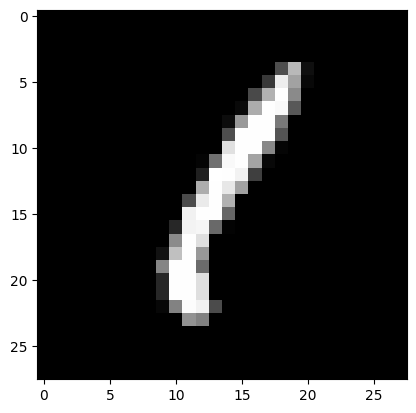

In [25]:
test=np.array(test_data[7])
plt.imshow(test.reshape(28,28),cmap='grey')

In [31]:
test=Vector(test_data[0])

In [26]:
y_pred=model(test)
y_pred.data.index(max(y_pred.data))

Array must be of same length


TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

In [33]:
target_test_data[0]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [34]:
y_pred=model(raw_training_data[0])
y_pred.data.index(max(y_pred.data))


6